## 초기환경 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/TDA'

In [ ]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.4 MB/s eta 0:00:00


## 파일 불러오기

In [ ]:
import csv
import pandas as pd

df = pd.read_csv(path + '/dataset/term/startup_2.csv', encoding='utf-8-sig')

In [ ]:
df.shape #10,366 건의 데이터

(10366, 19)

## 빈도 분석

In [ ]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd

In [ ]:
# 기사 원문을 토큰화하여 명사만 추출

# Okt 객체 생성
okt = Okt()

# 각 기사별로 명사 추출 후 리스트에 저장
tokens_const = []
for text in df['본문'].dropna():
    tokens_const.extend(okt.nouns(text))  # 개별 기사에서 명사 추출하여 리스트에 추가

# 1글자 단어 빼기
tokens_const = [token for token in tokens_const if len(token) > 1]

print('#토큰의 수:', len(tokens_const))
print(tokens_const[:100])

#토큰의 수: 376841
['정부', '백년', '소상', '공인', '해외', '진출', '적극', '중소', '벤처기업', '백년', '소상', '공인', '육성', '전략', '발표', '백년', '상공', '소상', '공인', '지속', '성장', '지원', '제도', '시행', '지금', '지역', '대표', '맛집', '전통', '공예', '소공', '백년', '상공', '발굴', '지원', '기부', '백년', '소상', '공인', '인증', '미쉐린', '블루리본', '인증', '웨어', '러블', '로봇', '스타트업', '로보틱스', '공동', '대표', '연백', '김용재', '한국', '기술', '교육', '대학교', '교수', '웨어', '러블', '로봇', '세계', '최대', '규모', '전시', '국제', '전자제품', '박람회', '이하', '연속', '로보틱스', '분야', '혁신', '민주당', '이재명', '대표', '최소한', '기업', '지배구조', '선진국', '수준', '반드시', '라며', '전날', '당론', '채택', '상법', '개정안', '추진', '의지', '재차', '강조', '대표', '국회', '최고', '위원', '회의', '재계', '상법', '개정안', '반대']


In [ ]:
# 뷸용어 지정

stopwords = [ '나', '너', '그', '저', '우리', '그들', '나는', '너는', '그는', '저는', '이', '그', '저',
              '이것', '저것', '그것', '어떤', '어느', '무엇', '왜', '왜냐하면', '그렇지만', '또는',
              '그리고', '하지만', '그러나', '같은', '한', '에서', '에', '으로', '로', '는', '가', '을',
              '를', '에', '에서', '의', '이다', '되다', '하다', '있다', '없다', '있으면', '없으면', '중',
              '대해', '때문에', '하는', '하는', '어떻게', '다시', '같이', '각', '많은', '한', '이번', '그렇다', '것', '위', '수',
             '뉴스레터', '구독', '투데이', '위해', '기자', '올해', '지난', '최근', '지난해'
]

tokens_const = [token for token in tokens_const if token not in stopwords]
print('#토큰의 수:', len(tokens_const))
print(tokens_const[:100])

#토큰의 수: 363560
['정부', '백년', '소상', '공인', '해외', '진출', '적극', '중소', '벤처기업', '백년', '소상', '공인', '육성', '전략', '발표', '백년', '상공', '소상', '공인', '지속', '성장', '지원', '제도', '시행', '지금', '지역', '대표', '맛집', '전통', '공예', '소공', '백년', '상공', '발굴', '지원', '기부', '백년', '소상', '공인', '인증', '미쉐린', '블루리본', '인증', '웨어', '러블', '로봇', '스타트업', '로보틱스', '공동', '대표', '연백', '김용재', '한국', '기술', '교육', '대학교', '교수', '웨어', '러블', '로봇', '세계', '최대', '규모', '전시', '국제', '전자제품', '박람회', '이하', '연속', '로보틱스', '분야', '혁신', '민주당', '이재명', '대표', '최소한', '기업', '지배구조', '선진국', '수준', '반드시', '라며', '전날', '당론', '채택', '상법', '개정안', '추진', '의지', '재차', '강조', '대표', '국회', '최고', '위원', '회의', '재계', '상법', '개정안', '반대']


In [ ]:
import platform
from matplotlib import font_manager, rc
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

[('확대', 1436), ('국내', 1449), ('지역', 1458), ('혁신', 1464), ('글로벌', 1536), ('시장', 1577), ('중소', 1611), ('창업', 1851), ('투자', 1857), ('서울', 1935), ('정부', 1971), ('아시아', 2286), ('산업', 2292), ('한국', 2308), ('기술', 2336), ('스타트업', 2841), ('사업', 3002), ('지원', 3666), ('중소기업', 4344), ('기업', 5251)]


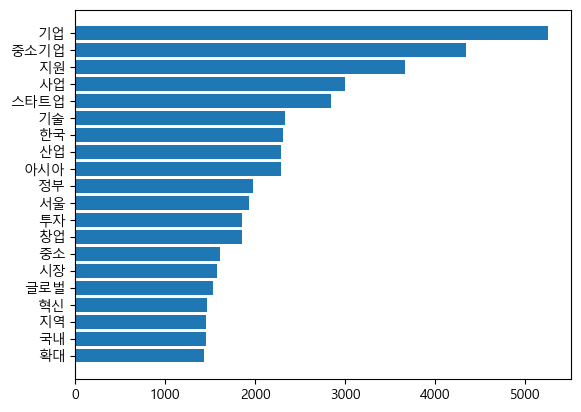

In [ ]:
# 상위 20개 명사의 빈도 그래프

fname=path+"/dataset/malgun.ttf" # 글꼴 파일 지정

# 한글 글꼴 지정 - 그대로 사용하기
font_manager.fontManager.addfont(fname)
font_name = font_manager.FontProperties(fname=fname).get_name()
plt.rcParams['font.family'] = font_name

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1 # 단어 빈도수 계산

def word_graph(cnt, max_words=10):

    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    plt.rc('font', family=font_name) # 폰트 지정
    plt.show()

word_graph(const_cnt, max_words=20)

In [ ]:
# 명사 빈도 계산
noun_counts = Counter(tokens_const)

# 상위 100개 명사와 빈도 출력
top_nouns = noun_counts.most_common(100)
print("상위 100개 명사와 빈도:")
for noun, count in top_nouns:
    print(f"{noun}: {count}")

상위 100개 명사와 빈도:
기업: 5251
중소기업: 4344
지원: 3666
사업: 3002
스타트업: 2841
기술: 2336
한국: 2308
산업: 2292
아시아: 2286
정부: 1971
서울: 1935
투자: 1857
창업: 1851
중소: 1611
시장: 1577
글로벌: 1536
혁신: 1464
지역: 1458
국내: 1449
확대: 1436
벤처기업: 1425
협력: 1407
경제: 1325
개최: 1189
수출: 1183
미국: 1159
대표: 1124
세계: 1124
센터: 1074
규모: 1073
개발: 1061
정책: 1059
분야: 1057
금융: 1033
성장: 990
지능: 986
인공: 973
발표: 943
통해: 941
최대: 931
추진: 919
은행: 896
대상: 873
미래: 842
진출: 839
해외: 836
진흥: 823
협약: 815
대한: 807
전략: 794
경기도: 789
장관: 773
청년: 768
대출: 753
반도체: 753
참여: 744
프로그램: 742
현지: 717
운영: 685
업무: 673
육성: 672
행사: 668
방안: 667
국민: 665
경기: 664
서비스: 661
진행: 650
사회: 649
경영: 647
위원회: 642
대통령: 636
중앙회: 633
자금: 627
시간: 621
관련: 620
중국: 613
기관: 610
그룹: 596
재해: 591
제품: 587
선정: 578
회장: 575
이상: 571
회의: 570
협회: 568
마련: 566
체결: 558
공인: 544
중대: 540
일본: 538
플랫폼: 536
계획: 535
업체: 529
강화: 518
소상: 509
국가: 504
테크: 499
국회: 496
제공: 496
대기업: 490


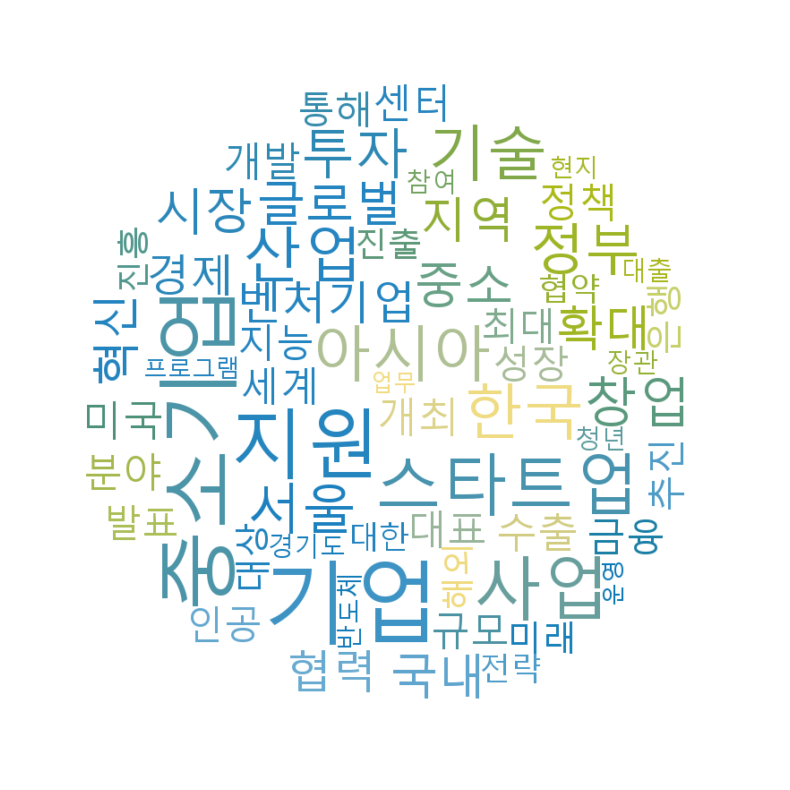

In [ ]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

font_path = path + '/dataset/malgun.ttf' # 폰트 경로 지정
IMG_MASK_PATH = path + "/images/earth.png" # 이미지 마스트 경로 지정
SAVE_IMG_PATH = path + "/results/term_startup1.png" # 생성된 결과물 저장 경로 지정

img_mask = np.array(Image.open(IMG_MASK_PATH)) # 이미지를 가져온 후 넘파이 배열로 저장
image_colors = ImageColorGenerator(img_mask) # 마스크의 색깔 따오기

wordcloud = WordCloud(
    font_path = font_path, # 폰트 지정
    mask = img_mask, # 이미지 마스크 지정
    max_font_size = 100, # 최대 글자수 지정
    background_color='white', # 이미지 배경색 지정
    max_words=60) # 최대 단어수 지정

# 형태소 분석 결과의 워드 클라우드 생성
wc = wordcloud.generate_from_frequencies(const_cnt) # 기존에 만든 딕셔너리 지정
# 이미지 색상으로 워드 클라우드에 색 입히기
wc = wc.recolor(color_func=image_colors)

# 원문으로부터 워드 클라우드 생성
# wc = wordcloud.generate(const_doc)

wc.to_file(SAVE_IMG_PATH) # 생성한 이미지를 파일로 저장

plt.figure(figsize = (10, 10))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

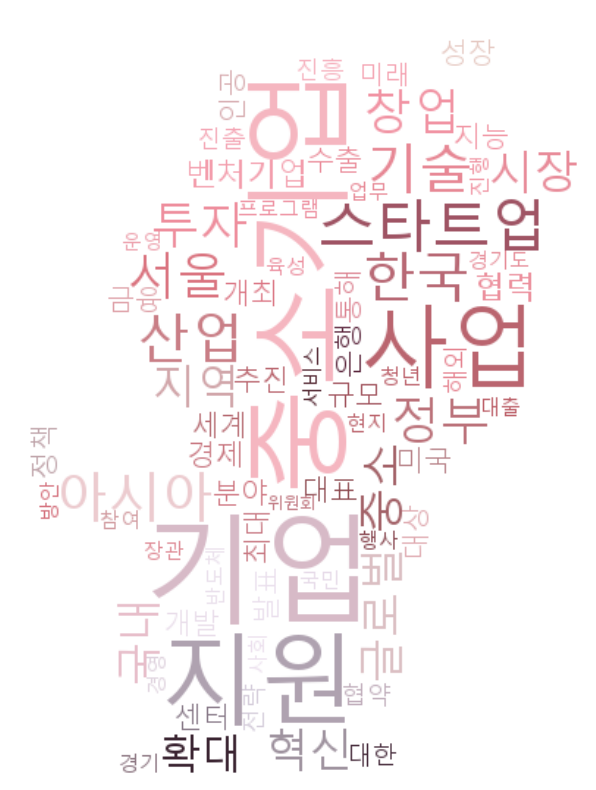

In [ ]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

font_path = path + '/dataset/malgun.ttf' # 폰트 경로 지정
IMG_MASK_PATH = path + "/images/loopy.png" # 이미지 마스트 경로 지정
SAVE_IMG_PATH = path + "/results/term_startup2.png" # 생성된 결과물 저장 경로 지정

img_mask = np.array(Image.open(IMG_MASK_PATH)) # 이미지를 가져온 후 넘파이 배열로 저장
image_colors = ImageColorGenerator(img_mask) # 마스크의 색깔 따오기

wordcloud = WordCloud(
    font_path = font_path, # 폰트 지정
    mask = img_mask, # 이미지 마스크 지정
    max_font_size = 80, # 최대 글자수 지정
    background_color='white', # 이미지 배경색 지정
    max_words=70) # 최대 단어수 지정

# 형태소 분석 결과의 워드 클라우드 생성
wc = wordcloud.generate_from_frequencies(const_cnt) # 기존에 만든 딕셔너리 지정
# 이미지 색상으로 워드 클라우드에 색 입히기
wc = wc.recolor(color_func=image_colors)

# 원문으로부터 워드 클라우드 생성
# wc = wordcloud.generate(const_doc)

wc.to_file(SAVE_IMG_PATH) # 생성한 이미지를 파일로 저장

plt.figure(figsize = (10, 10))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

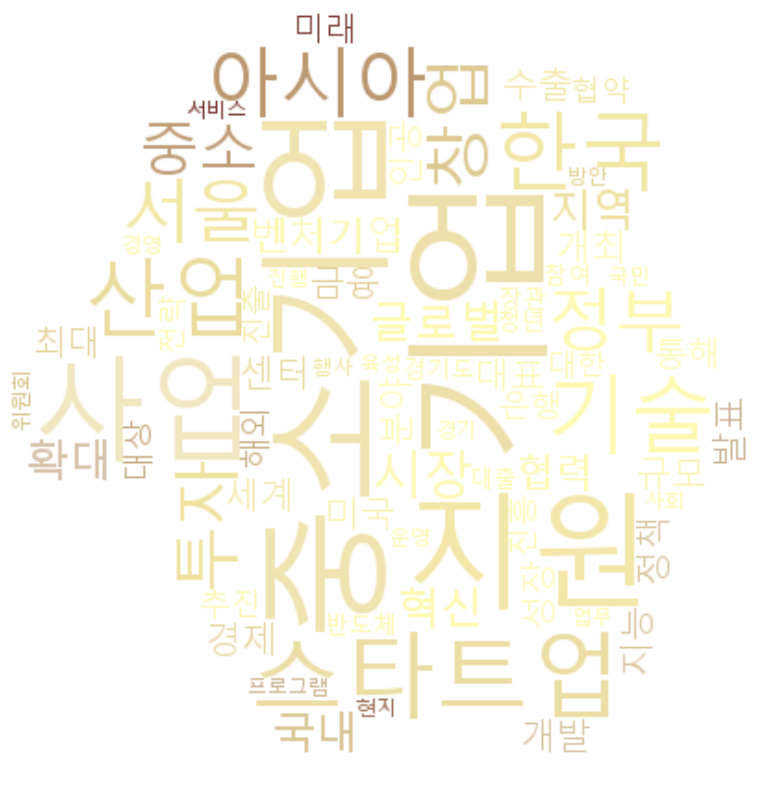

In [ ]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

font_path = path + '/dataset/malgun.ttf' # 폰트 경로 지정
IMG_MASK_PATH = path + "/images/pom.png" # 이미지 마스트 경로 지정
SAVE_IMG_PATH = path + "/results/term_startup3.png" # 생성된 결과물 저장 경로 지정

img_mask = np.array(Image.open(IMG_MASK_PATH)) # 이미지를 가져온 후 넘파이 배열로 저장
image_colors = ImageColorGenerator(img_mask) # 마스크의 색깔 따오기

wordcloud = WordCloud(
    font_path = font_path, # 폰트 지정
    mask = img_mask, # 이미지 마스크 지정
    max_font_size = 80, # 최대 글자수 지정
    background_color='white', # 이미지 배경색 지정
    max_words=70) # 최대 단어수 지정

# 형태소 분석 결과의 워드 클라우드 생성
wc = wordcloud.generate_from_frequencies(const_cnt) # 기존에 만든 딕셔너리 지정
# 이미지 색상으로 워드 클라우드에 색 입히기
wc = wc.recolor(color_func=image_colors)

# 원문으로부터 워드 클라우드 생성
# wc = wordcloud.generate(const_doc)

wc.to_file(SAVE_IMG_PATH) # 생성한 이미지를 파일로 저장

plt.figure(figsize = (10, 10))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

## 토픽 모델링

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, max_iter=5,
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='batch', n_jobs= -1, random_state=7)

review_topics = lda.fit_transform(const_cnt)
print('#shape of review_topics:', const_cnt.shape)
print('#Sample of review_topics:', const_cnt[0])
print('#shape of topic word distribution:', lda.components_.shape)

TypeError: float() argument must be a string or a real number, not 'dict'

In [ ]:
from gensim.corpora import Dictionary

# const_cnt의 빈도수가 문자열이라면 정수로 변환
const_cnt = {word: int(count) if isinstance(count, str) else count for word, count in const_cnt.items()}

# 단어 리스트를 생성 (빈도수와 상관없이 모든 단어를 포함)
texts = [[word] * count for word, count in const_cnt.items()]

# gensim Dictionary 객체 생성
dictionary = Dictionary(texts)

In [ ]:
# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n = 10000, no_below = 1, no_above = 0.7)
print('#Number of unique tokens after filtering: %d' % len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of documents: %d' % len(corpus))

#Number of unique tokens after filtering: 10000
#Number of documents: 17289


In [ ]:
# corpus와 dictionary가 비어 있는지 확인
print(f'Number of documents in corpus: {len(corpus)}')
print(f'Number of unique tokens in dictionary: {len(dictionary)}')

# 첫 번째 문서에 대한 단어-빈도 정보 확인
if len(corpus) > 0:
    print(f'First document: {corpus[0]}')

Number of documents in corpus: 17289
Number of unique tokens in dictionary: 10000
First document: [(0, 1971)]


In [ ]:
from gensim.models import LdaModel

model = LdaModel(corpus=corpus, id2word=dictionary,
                 passes=5, num_topics=10, random_state=7)
model.print_topics(num_words=5)

/usr/local/lib/python3.10/dist-packages/gensim/models/ldamodel.py:847: RuntimeWarning: divide by zero encountered in scalar divide
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


[(0, '0.079*"기술" + 0.067*"정부" + 0.035*"금융" + 0.034*"성장" + 0.027*"전략"'),
 (1, '0.111*"중소기업" + 0.094*"지원" + 0.059*"산업" + 0.040*"시장" + 0.036*"벤처기업"'),
 (2, '0.100*"스타트업" + 0.027*"청년" + 0.027*"반도체" + 0.026*"프로그램" + 0.023*"사회"'),
 (3, '0.095*"사업" + 0.073*"한국" + 0.059*"창업" + 0.051*"중소" + 0.030*"통해"'),
 (4, '0.052*"수출" + 0.047*"센터" + 0.042*"인공" + 0.019*"모집" + 0.018*"금리"'),
 (5, '0.082*"아시아" + 0.055*"글로벌" + 0.047*"경제" + 0.029*"진흥" + 0.024*"육성"'),
 (6, '0.052*"투자" + 0.041*"지역" + 0.040*"국내" + 0.031*"대표" + 0.031*"세계"'),
 (7, '0.042*"개최" + 0.033*"발표" + 0.030*"해외" + 0.024*"운영" + 0.024*"방안"'),
 (8, '0.059*"협력" + 0.031*"참여" + 0.027*"경영" + 0.026*"관련" + 0.024*"선정"'),
 (9, '0.146*"기업" + 0.054*"서울" + 0.041*"혁신" + 0.040*"확대" + 0.032*"미국"')]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, topic_word_prior= topic_word_prior,
                                        doc_topic_prior=doc_topic_prior, learning_method='batch', n_jobs= -1,random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

show_perplexity(review_cv, start=6, end=15)

NameError: name 'review_cv' is not defined

In [ ]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(0, 0.9995436)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

lda_viz = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.396173  0.013792       1        1  12.133940
9     -0.070599  0.352405       2        1  11.271558
6     -0.064605 -0.207232       3        1  11.224724
4     -0.032451 -0.017425       4        1  10.495244
3     -0.043182 -0.031167       5        1   9.941870
0     -0.039549 -0.025217       6        1   9.397734
2     -0.037754 -0.022769       7        1   9.044632
7     -0.037705 -0.022393       8        1   9.034496
5     -0.037212 -0.021993       9        1   8.926046
8     -0.033118 -0.018001      10        1   8.529756, topic_info=      Term         Freq        Total Category  logprob  loglift
57      기업  5713.000000  5713.000000  Default  30.0000  30.0000
276   중소기업  4698.000000  4698.000000  Default  29.0000  29.0000
15      지원  3965.000000  3965.000000  Default  28.0000  28.0000
338     사업  3306.000000  3306.000000  Default  27.0000  27.0000
33    스타트업  3160.000000  3160.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
957    여의도   278.937741   284.184721  Topic10  -4.6668   2.4430
1003    해결   276.441764   281.688682  Topic10  -4.6758   2.4428
386     신용   273.945649   279.192567  Topic10  -4.6849   2.4426
1624   기업인   267.705569   272.952487  Topic10  -4.7079   2.4422
540   우리나라   265.209454   270.456372  Topic10  -4.7173   2.4420

[330 rows x 6 columns], token_table=      Topic      Freq Term
term                      
115       1  0.990307  가운데
115       2  0.001923  가운데
115       3  0.001923  가운데
115       4  0.001923  가운데
115       5  0.001923  가운데
...     ...       ...  ...
942       6  0.992443   회장
942       7  0.001558   회장
942       8  0.001558   회장
942       9  0.001558   회장
942      10  0.001558   회장

[3000 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 7, 5, 4, 1, 3, 8, 6, 9])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. 단어 리스트를 문자열로 변환
documents = [' '.join([word for word in text]) for text in texts]

# 2. CountVectorizer를 사용하여 Bag-of-Words 생성
vec = CountVectorizer(max_features=10000)  # Gensim에서 keep_n=10000을 사용했으므로 동일하게 설정
pet_cv = vec.fit_transform(documents)

# 3. LDA 모델 학습
lda = LatentDirichletAllocation(n_components=10, n_jobs=-1, random_state=0)
%time pet_topics = lda.fit_transform(pet_cv)

# 4. 주요 키워드 출력 함수 정의
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# 5. 주요 키워드 출력
print_top_words(lda, vec.get_feature_names_out(), 15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1.06 s, sys: 88 ms, total: 1.15 s
Wall time: 14.1 s
Topic #0: 사업, 금융, 추진, 미래, 육성, 방안, 재해, 협회, 마련, 업체, 소상, 발전, 제도, 상공, 지난달
Topic #1: 중소기업, 지원, 서울, 확대, 대표, 센터, 협약, 자금, 제품, 체결, 공인, 강화, 증가, 시행, 활용
Topic #2: 중소, 경제, 지능, 장관, 대출, 사회, 대통령, 선정, 회장, 회의, 일본, 가운데, 적용, 모집, 대책
Topic #3: 아시아, 투자, 글로벌, 인공, 테크, 환경, 기준, 전환, 안전, 유치, 규제, 고용, 포럼, 문화, 경쟁
Topic #4: 기술, 시장, 혁신, 대상, 반도체, 프로그램, 행사, 경기, 시간, 상생, 생산, 금리, 참석, 우수, 목표
Topic #5: 한국, 수출, 세계, 개발, 발표, 경기도, 청년, 현지, 중국, 제공, 전자, 유예, 구축, 문제, 미만
Topic #6: 국내, 협력, 규모, 정책, 대한, 업무, 경영, 중대, 계획, 국가, 활성화, 공동, 이하, 부담, 대응
Topic #7: 기업, 스타트업, 지역, 분야, 성장, 최대, 진출, 진흥, 참여, 서비스, 위원회, 중앙회, 관련, 플랫폼, 국회
Topic #8: 산업, 정부, 벤처기업, 개최, 미국, 통해, 은행, 해외, 운영, 진행, 이상, 현장, 내용, 방문, 국제
Topic #9: 창업, 전략, 국민, 기관, 그룹, 주요, 일자리, 시작, 발굴, 공사, 기부, 결과, 공개, 처음, 상담


In [ ]:
# '일자' 컬럼을 문자열로 변환 후 날짜 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'].astype(str), format='%Y%m%d')

# 결과 확인
df['일자'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: time data "2024-11-15" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
trend_data = pd.DataFrame(pet_topics, columns=['Topic'+str(i) for i in range(0, 10)])
trend_data = pd.concat([trend_data, df['일자'].map(lambda x: x.strftime('%Y-%m'))], axis=1)
trend = trend_data.groupby(['일자']).mean()
trend.iloc[:4,-5:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic5,Topic6,Topic7,Topic8,Topic9
일자,,,,,
2024-01,0.096581,0.101374,0.096486,0.107617,0.094684
2024-02,0.098225,0.109408,0.098549,0.089314,0.095115
2024-03,0.113317,0.096781,0.100369,0.100593,0.103782
2024-04,0.106130,0.100780,0.110889,0.095789,0.100256


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


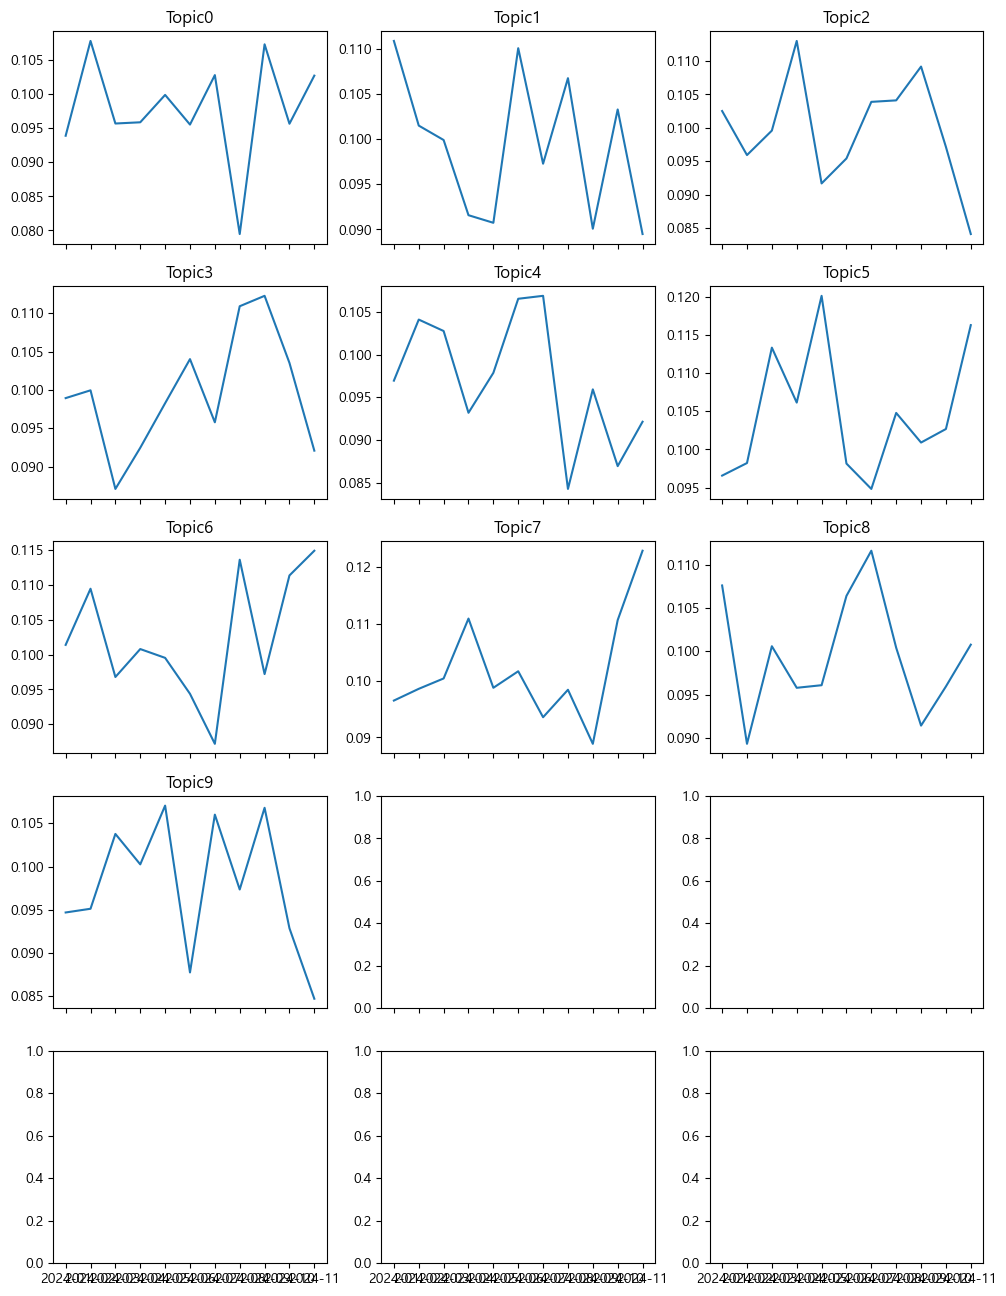

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(True)
    ax.plot(trend[col])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


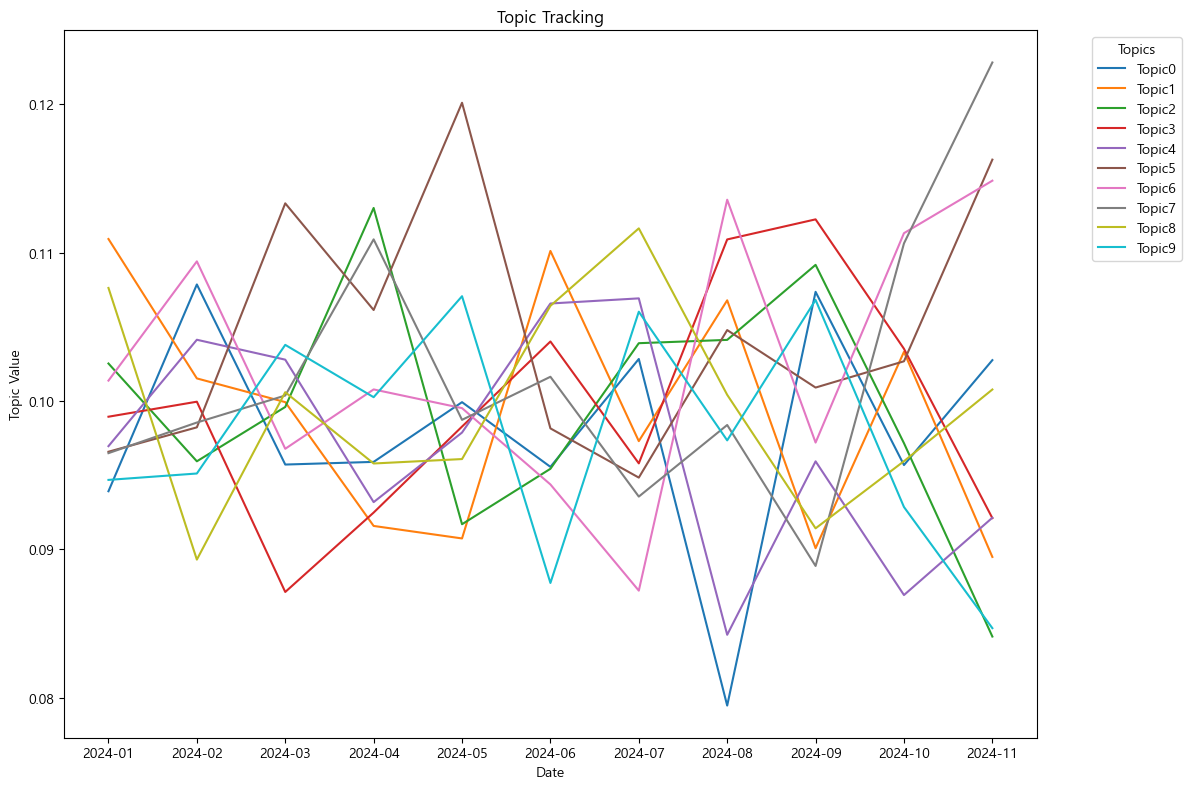

In [ ]:
import matplotlib.pyplot as plt

# 한 그래프에서 여러 토픽을 동시에 플로팅
plt.figure(figsize=(12, 8))

# 각 토픽의 트렌드를 한 그래프에 그리기
for col in trend.columns:
    plt.plot(trend.index, trend[col], label=col)  # 각 토픽에 대한 트렌드를 플로팅

# 그래프 제목과 레이블 추가
plt.title('Topic Tracking')
plt.xlabel('Date')
plt.ylabel('Topic Value')

# 범례 추가
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
twit = Okt()

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer=tokenizer,
                      max_df=0.5, min_df = 5,
                      max_features = 1000)

pet_cv = vec.fit_transform(df['본문'])
print(pet_cv.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(7972, 1000)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10, n_jobs= -1, random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
print_top_words(lda,vec.get_feature_names_out(), 10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1.15 s, sys: 90.9 ms, total: 1.24 s
Wall time: 34.7 s
Topic #0: 세계, 최대, 전시회, 미국, 박람회, 국제, 한국, 국내, 규모, 올해
Topic #1: 스타트업, 투자, 창업, 기업, 유치, 지원, 유료, 프로그램, 레이, 가입
Topic #2: 지능, 인공, 서비스, 스타트업, 기업, 개발, 대표, 플랫폼, 로봇, 카카오
Topic #3: 투자, 전자, 기업, 삼성, 스타트업, 업체, 회장, 신생, 규모, 국내
Topic #4: 청년, 교육, 문제, 국민, 일자리, 진행, 서울, 대상, 대표, 위해
Topic #5: 정부, 펀드, 투자, 산업, 한국, 경제, 회의, 협회, 기자, 규모
Topic #6: 스타트업, 시장, 기술, 미국, 한국, 기업, 글로벌, 국내, 은행, 자율
Topic #7: 대통령, 현지, 윤석열, 중국, 방문, 미국, 시간, 베트남, 협력, 경제
Topic #8: 협약, 업무, 스타트업, 체결, 센터, 지역, 지원, 사업, 혁신, 협력
Topic #9: 창업, 스타트업, 기업, 혁신, 지원, 사업, 기술, 서울, 센터, 개최
Topic #10: 기업, 지원, 일본, 글로벌, 중소기업, 서울, 협업, 창업, 콘텐츠, 프로그램
Topic #11: 서울시, 서울, 예산, 올해, 내년, 사회, 문화, 오세훈, 정부, 위기
Topic #12: 기술, 산업, 반도체, 바이오, 분야, 경기도, 미래, 우주, 첨단, 지능
Topic #13: 사업, 그룹, 기자, 아시아, 투데이, 금융, 투자, 미래, 기술, 성장
Topic #14: 벤처기업, 중소, 스타트업, 아시아, 장관, 기자, 투데이, 글로벌, 중소기업, 기부
